¡Hola!

Mi nombre es Marcos Torres y tengo el gusto de revisar tu código el día de hoy.

Cuando vea algo notable o algún asunto en el notebook, te dejaré un comentario o un hint. Se que encontraras la mejor respuesta para resolver todos los comentarios, de no ser así, no te preocupes en futuras iteraciones dejaré comentarios y pistas más específicos.

Encontrarás comentarios en verde, amarillo o rojo como los siguientes:

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Buen trabajo. ¡Lo hiciste muy bien!
</div>

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Nota. Se puede mejorar.
</div>

<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Necesitas corregirlo. Este bloque indica que se requiere una correción. El trabajo no se acepta si tiene estos bloques.
</div>

Puedes responder a mis comentarios usando estos bloques:

<div class="alert alert-block alert-info">
<b>Respuesta del estudiante.</b> <a class="tocSkip"></a>
</div>

# ¡Llena ese carrito!

# Introducción

Instacart es una plataforma de entregas de comestibles donde la clientela puede registrar un pedido y hacer que se lo entreguen, similar a Uber Eats y Door Dash.
El conjunto de datos que te hemos proporcionado tiene modificaciones del original. Redujimos el tamaño del conjunto para que tus cálculos se hicieran más rápido e introdujimos valores ausentes y duplicados. Tuvimos cuidado de conservar las distribuciones de los datos originales cuando hicimos los cambios.

Debes completar tres pasos. Para cada uno de ellos, escribe una breve introducción que refleje con claridad cómo pretendes resolver cada paso, y escribe párrafos explicatorios que justifiquen tus decisiones al tiempo que avanzas en tu solución.  También escribe una conclusión que resuma tus hallazgos y elecciones.


## Diccionario de datos

Hay cinco tablas en el conjunto de datos, y tendrás que usarlas todas para hacer el preprocesamiento de datos y el análisis exploratorio de datos. A continuación se muestra un diccionario de datos que enumera las columnas de cada tabla y describe los datos que contienen.

- `instacart_orders.csv`: cada fila corresponde a un pedido en la aplicación Instacart.
    - `'order_id'`: número de ID que identifica de manera única cada pedido.
    - `'user_id'`: número de ID que identifica de manera única la cuenta de cada cliente.
    - `'order_number'`: el número de veces que este cliente ha hecho un pedido.
    - `'order_dow'`: día de la semana en que se hizo el pedido (0 si es domingo).
    - `'order_hour_of_day'`: hora del día en que se hizo el pedido.
    - `'days_since_prior_order'`: número de días transcurridos desde que este cliente hizo su pedido anterior.
- `products.csv`: cada fila corresponde a un producto único que pueden comprar los clientes.
    - `'product_id'`: número ID que identifica de manera única cada producto.
    - `'product_name'`: nombre del producto.
    - `'aisle_id'`: número ID que identifica de manera única cada categoría de pasillo de víveres.
    - `'department_id'`: número ID que identifica de manera única cada departamento de víveres.
- `order_products.csv`: cada fila corresponde a un artículo pedido en un pedido.
    - `'order_id'`: número de ID que identifica de manera única cada pedido.
    - `'product_id'`: número ID que identifica de manera única cada producto.
    - `'add_to_cart_order'`: el orden secuencial en el que se añadió cada artículo en el carrito.
    - `'reordered'`: 0 si el cliente nunca ha pedido este producto antes, 1 si lo ha pedido.
- `aisles.csv`
    - `'aisle_id'`: número ID que identifica de manera única cada categoría de pasillo de víveres.
    - `'aisle'`: nombre del pasillo.
- `departments.csv`
    - `'department_id'`: número ID que identifica de manera única cada departamento de víveres.
    - `'department'`: nombre del departamento.

# Paso 1. Descripción de los datos

Lee los archivos de datos (`/datasets/instacart_orders.csv`, `/datasets/products.csv`, `/datasets/aisles.csv`, `/datasets/departments.csv` y `/datasets/order_products.csv`) con `pd.read_csv()` usando los parámetros adecuados para leer los datos correctamente. Verifica la información para cada DataFrame creado.


## Plan de solución

Escribe aquí tu plan de solución para el Paso 1. Descripción de los datos.

In [4]:
# importar librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
# leer conjuntos de datos en los DataFrames
df_orders=pd.read_csv('/datasets/instacart_orders.csv',sep=';')
df_products=pd.read_csv('/datasets/products.csv',sep=';')
df_aisles=pd.read_csv('/datasets/aisles.csv',sep=';')
df_departments=pd.read_csv('/datasets/departments.csv',sep=';')
df_order_products=pd.read_csv('/datasets/order_products.csv',sep=';')

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Bien hecho, se usó una celda independiente para importar las librerías y otra para leer los datos.
</div>

In [169]:
# mostrar información del DataFrame
df_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478967 entries, 0 to 478966
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   order_id                478967 non-null  int64  
 1   user_id                 478967 non-null  int64  
 2   order_number            478967 non-null  int64  
 3   order_dow               478967 non-null  int64  
 4   order_hour_of_day       478967 non-null  int64  
 5   days_since_prior_order  450148 non-null  float64
dtypes: float64(1), int64(5)
memory usage: 21.9 MB


In [14]:
# mostrar información del DataFrame
df_products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49694 entries, 0 to 49693
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49694 non-null  int64 
 1   product_name   48436 non-null  object
 2   aisle_id       49694 non-null  int64 
 3   department_id  49694 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


In [18]:
# mostrar información del DataFrame
df_aisles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   aisle_id  134 non-null    int64 
 1   aisle     134 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.2+ KB


In [20]:
# mostrar información del DataFrame
df_departments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   department_id  21 non-null     int64 
 1   department     21 non-null     object
dtypes: int64(1), object(1)
memory usage: 464.0+ bytes


In [43]:
# mostrar información del DataFrame
df_order_products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Dtype  
---  ------             -----  
 0   order_id           int64  
 1   product_id         int64  
 2   add_to_cart_order  float64
 3   reordered          int64  
dtypes: float64(1), int64(3)
memory usage: 138.7 MB


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Buen uso de los métodos de pandas para explorar los datos.
</div>

## Conclusiones

es importante notar que todos los datafreames son diferentes, tienen diferentes filas y columnas, como que también el separador no es coma sino ;
ya despues de cargados se puede empezar a trabajar

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Buenas conclusiones intermedias.
</div>

# Paso 2. Preprocesamiento de los datos

Preprocesa los datos de la siguiente manera:

- Verifica y corrige los tipos de datos (por ejemplo, asegúrate de que las columnas de ID sean números enteros).
- Identifica y completa los valores ausentes.
- Identifica y elimina los valores duplicados.

Asegúrate de explicar qué tipos de valores ausentes y duplicados encontraste, cómo los completaste o eliminaste y por qué usaste esos métodos. ¿Por qué crees que estos valores ausentes y duplicados pueden haber estado presentes en el conjunto de datos?

## Plan de solución

Escribe aquí tu plan para el Paso 2. Preprocesamiento de los datos.

## Encuentra y elimina los valores duplicados (y describe cómo tomaste tus decisiones).

### `orders` data frame

In [7]:
# Revisa si hay pedidos duplicados
print('duplicados en orders', df_orders.duplicated().sum())

print(df_orders[df_orders.duplicated(keep=False)])

duplicados en orders 15
        order_id  user_id  order_number  order_dow  order_hour_of_day  \
30371    1918001   188546            14          3                  2   
99462     794638    50898            24          3                  2   
119251    408114    68324             4          3                  2   
142258   2845099    31189            11          3                  2   
145574    794638    50898            24          3                  2   
164581   1112182   202304            84          3                  2   
200059   1782114   106752             1          3                  2   
204042   2125197    14050            48          3                  2   
215294   2160484   107525            16          3                  2   
223105   2160484   107525            16          3                  2   
230807   1918001   188546            14          3                  2   
242618   1021560    53767             3          3                  2   
250626    467134    63189  

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Bien, se han visualizado correctamente los duplicados.
</div>

¿Tienes líneas duplicadas? Si sí, ¿qué tienen en común? todos los duplicados se hicieron el miércoles A LAS 2:00 AM

In [8]:
# Basándote en tus hallazgos,
# Verifica todos los pedidos que se hicieron el miércoles a las 2:00 a.m.
print(df_orders[(df_orders['order_dow']==3) & (df_orders['order_hour_of_day']==2)])

        order_id  user_id  order_number  order_dow  order_hour_of_day  \
4838     2766110   162084            41          3                  2   
5156     2190225   138285            18          3                  2   
15506     553049    58599            13          3                  2   
18420     382357   120200            19          3                  2   
24691     690242    77357             2          3                  2   
...          ...      ...           ...        ...                ...   
457013   3384021    14881             6          3                  2   
458816    910166   164782            18          3                  2   
459635   1680532   106435             6          3                  2   
468324    222962    54979            59          3                  2   
477526   2592344    46860            38          3                  2   

        days_since_prior_order  
4838                      16.0  
5156                      11.0  
15506                   

¿Qué sugiere este resultado? Hay más de los que se ven en los duplicados, entonces así verificamos que en la lista de duoplicados si están duplicados, pues no todos los de miercoles a las 2:00 am estan en la lista


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

¡Bien! Esto demuestra correctamente el origen de los duplicados.
</div>

In [9]:
# Elimina los pedidos duplicados
df_orders.drop_duplicates(inplace=True)
df_orders=df_orders.reset_index(drop=True)

In [10]:
# Vuelve a verificar si hay filas duplicadas
print('duplicados en orders', df_orders.duplicated().sum())

duplicados en orders 0


In [11]:
# Vuelve a verificar únicamente si hay IDs duplicados de pedidos
 
print('duplicados en orders ID', df_orders['order_id'].duplicated().sum())

duplicados en orders ID 0


Describe brevemente tus hallazgos y lo que hiciste con ellos:
- en la columna de Id no hay duplicados

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Bien hecho, manejaste correctamente los duplicados.
</div>

### `products` data frame

In [12]:
# Verifica si hay filas totalmente duplicadas
df_products=pd.read_csv('/datasets/products.csv',sep=';')
print('duplicados en products', df_products.duplicated().sum())


duplicados en products 0


In [13]:
# Revisa únicamente si hay ID de departamentos duplicados
print('duplicados en product ID', df_products['product_id'].duplicated().sum())

duplicados en product ID 0


In [14]:
# Revisa únicamente si hay nombres duplicados de productos (convierte los nombres a letras mayúsculas para compararlos mejor)
df_products['product_name']=df_products['product_name'].str.lower()
print('duplicados en product name', df_products['product_name'].duplicated().sum())
print(df_products['product_name'][df_products['product_name'].duplicated(keep=False)].sample(15))

duplicados en product name 1361
48737                             NaN
24570    tomato and basil pasta sauce
4387               vitamin d3 2000 iu
47335                             NaN
46873              vitamin d3 5000 iu
5306                              NaN
43668                             NaN
32088                             NaN
34117                             NaN
12738                             NaN
32209                             NaN
31208                             NaN
20884                             NaN
2031                              NaN
7262                              NaN
Name: product_name, dtype: object


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Buen uso de los métodos de pandas para explorar los datos de este data frame.
</div>

In [15]:
# Revisa si hay nombres duplicados de productos no faltantes
print('duplicados en product name', df_products['product_name'].dropna().duplicated().sum())
print()

#Hice una columna con solo la lista de duplicados
m=df_products['product_name'].dropna()
m=(m.reset_index(drop=True))

#Probé si el Id era diferente y e resto de columnas
print(df_products[df_products['product_name']== m[182]])
#Al ver que el Id y las columnas eran iguale spara los dos, los eliminé conservando uno
df_nan = df_products[df_products['product_name'].isna()] #Esto es para no alterar que eliminara los NaN
df_products.drop_duplicates(subset=['product_name'],inplace = True,ignore_index=True)
df_products = pd.concat([df_products, df_nan])


duplicados en product name 104

       product_id                                product_name  aisle_id  \
185           186  fresh scent dishwasher detergent with dawn        74   
19042       19043  fresh scent dishwasher detergent with dawn        74   

       department_id  
185               17  
19042             17  


Describe brevemente tus hallazgos y lo que hiciste con ellos:
Como vi que habían nombres de productos repetidos lo que hice fue asegurarme de que no se tratara de productos diferentes que tuvieran el mismo nombre. Parara eso cree una columna con todos los repetidos e imprimi algunos en el DataFrame original para comparar sus ID y el resto de columnas, al darme cuenta que en todos los que probé eran igualales eliminé los duplicados solamente dejando uno (para no perder la información de ese producto)

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

¡Muy bien! Se manejaron correctamente los datos para eliminar los duplicados en los productos.
</div>

### `departments` data frame

In [16]:
# Revisa si hay filas totalmente duplicadas

print('duplicados en departments', df_departments.duplicated().sum())


duplicados en departments 0


In [17]:
# Revisa únicamente si hay IDs duplicadas de productos
print('duplicados en departments ID', df_departments['department_id'].duplicated().sum())

duplicados en departments ID 0


Describe brevemente tus hallazgos y lo que hiciste con ellos: No habían duplicados

### `aisles` data frame

In [18]:
# Revisa si hay filas totalmente duplicadas
print('duplicados en aisles', df_aisles.duplicated().sum())

duplicados en aisles 0


In [19]:
# Revisa únicamente si hay IDs duplicadas de pasillos
print('duplicados en aisles  ID', df_aisles['aisle_id'].duplicated().sum())

duplicados en aisles  ID 0


Describe brevemente tus hallazgos y lo que hiciste con ellos : No habían duplicados

### `order_products` data frame

In [20]:
# Revisa si hay filas totalmente duplicadas
print('duplicados en order_products', df_order_products.duplicated().sum())

duplicados en order_products 0


In [21]:
# Vuelve a verificar si hay cualquier otro duplicado engañoso
print('duplicados en order_products', df_order_products.nunique())
print(df_order_products['order_id'].duplicated().sum())


duplicados en order_products order_id             450046
product_id            45573
add_to_cart_order        64
reordered                 2
dtype: int64
4094961


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Bien hecho, exploraste adecuadamente estas tablas.
</div>

Describe brevemente tus hallazgos y lo que hiciste con ellos. hay duplicados, sin embargo como son convinaciones entre el producto y la orden los dejé. 

## Encuentra y elimina los valores ausentes

Al trabajar con valores duplicados, pudimos observar que también nos falta investigar valores ausentes:

* La columna `'product_name'` de la tabla products.
* La columna `'days_since_prior_order'` de la tabla orders.
* La columna `'add_to_cart_order'` de la tabla order_productos.

### `products` data frame

In [22]:
# Encuentra los valores ausentes en la columna 'product_name'
print('is NaN:   ',df_products['product_name'].isna().sum())
df_products_nan = df_products[df_products['product_name'].isna()]
print(df_products_nan.sample(10))

is NaN:    1259
       product_id product_name  aisle_id  department_id
13269       13270          NaN       100             21
25376       25377          NaN       100             21
11049       11050          NaN       100             21
26589       26590          NaN       100             21
41936       41937          NaN       100             21
48759       48760          NaN       100             21
12368       12369          NaN       100             21
28196       28197          NaN       100             21
43708       43709          NaN       100             21
46796       46797          NaN       100             21


Describe brevemente cuáles son tus hallazgos:
Hay varios espacios en blanco que aparentemente todos tienen que ver con el pasillo 100 y el departamento de víveres 21


In [23]:
#  ¿Todos los nombres de productos ausentes están relacionados con el pasillo con ID 100?
print('de los NaN: ',df_products['product_name'].isna().sum(),'del pasillo 100 son:  ',df_products_nan[df_products_nan['aisle_id']== 100]['aisle_id'].count())

de los NaN:  1259 del pasillo 100 son:   1259


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Bien, encontraste los valores ausentes.
</div>

Describe brevemente cuáles son tus hallazgos: Hay varios espacios en blanco que todos tienen que ver con el pasillo 100 y aparentemente el departamento de víveres 21

In [24]:
# ¿Todos los nombres de productos ausentes están relacionados con el departamento con ID 21?
print('de los NaN: ',df_products['product_name'].isna().sum(),'del pasillo 100 son:  ',df_products_nan[df_products_nan['department_id']== 21]['department_id'].count())

de los NaN:  1259 del pasillo 100 son:   1259


Describe brevemente cuáles son tus hallazgos: Describe brevemente cuáles son tus hallazgos: Hay varios espacios en blanco que todos tienen que ver con el pasillo 100 y el departamento de víveres 21

In [25]:
# Usa las tablas department y aisle para revisar los datos del pasillo con ID 100 y el departamento con ID 21.
print(df_aisles[df_aisles['aisle_id']==100])
print(df_departments[df_departments['department_id']==21])

    aisle_id    aisle
99       100  missing
    department_id department
20             21    missing


Describe brevemente cuáles son tus hallazgos. los dos dice que faltantes 

In [26]:
# Completa los nombres de productos ausentes con 'Unknown'
df_products['product_name']=df_products['product_name'].fillna('Unknown')


Describe brevemente tus hallazgos y lo que hiciste con ellos.

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Buen trabajo, completaste correctamente los valores ausentes con Unkown.
</div>

### `orders` data frame

In [27]:
# Encuentra los valores ausentes
print('Valores ausentes de Orders: ')
print(df_orders.isna().sum())
print(df_orders.head())

Valores ausentes de Orders: 
order_id                      0
user_id                       0
order_number                  0
order_dow                     0
order_hour_of_day             0
days_since_prior_order    28817
dtype: int64
   order_id  user_id  order_number  order_dow  order_hour_of_day  \
0   1515936   183418            11          6                 13   
1   1690866   163593             5          5                 12   
2   1454967    39980             4          5                 19   
3   1768857    82516            56          0                 20   
4   3007858   196724             2          4                 12   

   days_since_prior_order  
0                    30.0  
1                     9.0  
2                     2.0  
3                    10.0  
4                    17.0  


In [28]:
# ¿Hay algún valor ausente que no sea el primer pedido del cliente?
df_order_number_1=df_orders[df_orders['order_number']==1]
print('La cantidad de primeros pedidos es: ',df_order_number_1['order_number'].count(),
      'La cantidad de dias nulos para esos primeros pedidos es: ',df_order_number_1[df_order_number_1['days_since_prior_order'].isna()==True]['order_number'].count())

La cantidad de primeros pedidos es:  28817 La cantidad de dias nulos para esos primeros pedidos es:  28817


Describe brevemente tus hallazgos y lo que hiciste con ellos. la respuesta es que no, todos los valores ausentes corresponden a las primeras ordenes

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Bien hecho, encontraste la relación entre los nulos y su posición en la que fueron ordenadas.
</div>

### `order_products` data frame

In [29]:
# Encuentra los valores ausentes

print('Valores ausentes de order_products: ')
print(df_order_products.isna().sum())

Valores ausentes de order_products: 
order_id               0
product_id             0
add_to_cart_order    836
reordered              0
dtype: int64


In [30]:
# ¿Cuáles son los valores mínimos y máximos en esta columna?
print('EL valor mínimo de orden secuencial en el que se añadió cada artículo en el carrito es:  ',df_order_products['add_to_cart_order'].min())
print('Mientras que el valor máximo es:  ',df_order_products['add_to_cart_order'].max())


EL valor mínimo de orden secuencial en el que se añadió cada artículo en el carrito es:   1.0
Mientras que el valor máximo es:   64.0


Describe brevemente cuáles son tus hallazgos. el rango de 'add_to_cart_order' es de 1 a 64

In [31]:
# Guarda todas las IDs de pedidos que tengan un valor ausente en 'add_to_cart_order'
df_order_products_Id_Null=df_order_products[df_order_products['add_to_cart_order'].isna()==True]
#df_order_products_Id_Null=df_order_products_Id_Null.drop(['add_to_cart_order','reordered'],axis=1)
print(df_order_products_Id_Null.head(10))

       order_id  product_id  add_to_cart_order  reordered
737     2449164        5068                NaN          0
9926    1968313       43867                NaN          0
14394   2926893       11688                NaN          0
16418   1717990        4142                NaN          0
30114   1959075       42828                NaN          1
34183    844733       32717                NaN          0
57981     61355        5322                NaN          0
58228    936852       31373                NaN          1
62655    264710       40281                NaN          0
64336   1717990       39408                NaN          0


In [32]:
# ¿Todos los pedidos con valores ausentes tienen más de 64 productos?
# Agrupa todos los pedidos con datos ausentes por su ID de pedido.
print(df_order_products_Id_Null.groupby('order_id')['product_id'].count())
# Cuenta el número de 'product_id' en cada pedido y revisa el valor mínimo del conteo.
print(df_order_products_Id_Null.groupby('order_id')['product_id'].count().min())


order_id
9310        1
61355      63
102236     31
129627      5
165801      6
           ..
2999801     6
3125735    22
3308010    51
3347453     7
3383594     5
Name: product_id, Length: 70, dtype: int64
1


Describe brevemente cuáles son tus hallazgos. No todos los pedidos con valores ausentes tienen más de 64 productos, de hecho el máximo es de 63

In [33]:
# Remplaza los valores ausentes en la columna 'add_to_cart' con 999 y convierte la columna al tipo entero.
df_order_products['add_to_cart_order']=df_order_products['add_to_cart_order'].fillna(999).astype(int)

Describe brevemente tus hallazgos y lo que hiciste con ellos. Se hizo el cambio y se pasó a entero. el cambio funciona pues esta fuera del rengo normal de 'add_to_cart_order'

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Buen trabajo, se completaron correctamente estos datos faltantes.
</div>

## Conclusiones

Se ve que los datafreames tenian trabajo para arreglar antes de pasar al análisis, se hicieron los camnios correspondientes y las consultas correspondientes para dejar listos los datos para anañlizarlos y así ver bien los resultados sin necesidad de tener problemas por datos erroneos.


# Paso 3. Análisis de los datos

Una vez los datos estén procesados y listos, haz el siguiente análisis:

# [A] Fácil (deben completarse todos para aprobar)

1. Verifica que los valores en las columnas `'order_hour_of_day'` y `'order_dow'` en la tabla orders sean razonables (es decir, `'order_hour_of_day'` oscile entre 0 y 23 y `'order_dow'` oscile entre 0 y 6).
2. Crea un gráfico que muestre el número de personas que hacen pedidos dependiendo de la hora del día.
3. Crea un gráfico que muestre qué día de la semana la gente hace sus compras.
4. Crea un gráfico que muestre el tiempo que la gente espera hasta hacer su siguiente pedido, y comenta sobre los valores mínimos y máximos.

### [A1] Verifica que los valores sean sensibles

In [30]:
print('Los valores en las columnas order_hour_of_day oscilan entre',df_orders['order_hour_of_day'].min(),'y',df_orders['order_hour_of_day'].max())
print('Por lo cual sabemos que están bien, en el rango correcto')

Los valores en las columnas order_hour_of_day oscilan entre 0 y 23
Por lo cual sabemos que están bien, en el rango correcto


In [31]:
print('Los valores en las columnas order_dow oscilan entre',df_orders['order_dow'].min(),'y',df_orders['order_dow'].max())
print('Por lo cual sabemos que están bien, en el rango correcto')

Los valores en las columnas order_dow oscilan entre 0 y 6
Por lo cual sabemos que están bien, en el rango correcto


En los dos casos se puede verificar que están bien. 

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

¡Muy bien! Encontraste el rango en el que oscilan los datos de fecha y hora.
</div>

### [A2] Para cada hora del día, ¿cuántas personas hacen órdenes?

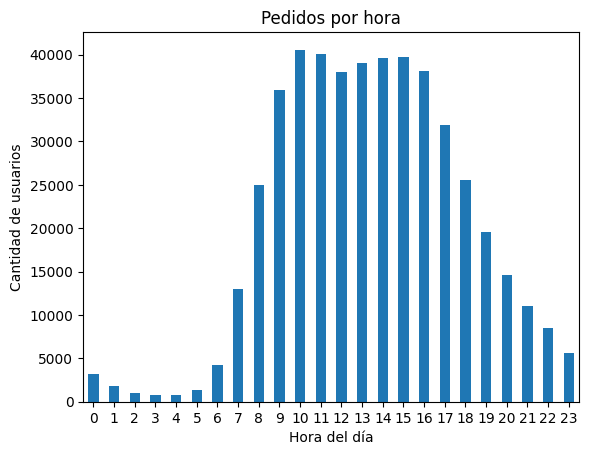

In [32]:
df_plot_A2=df_orders.groupby('order_hour_of_day')['user_id'].count()
df_plot_A2.plot(kind='bar',
               xlabel='Hora del día',
               ylabel='Cantidad de usuarios',
               title='Pedidos por hora',
               rot=0)
plt.show()

Con la grafica se ve que de 9 a 5 el numero de compras crece muchisimo

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Muy buen histograma que nos muestra la distribución de los pedidos entre las horas del día.
</div>

### [A3] ¿Qué día de la semana compran víveres las personas?

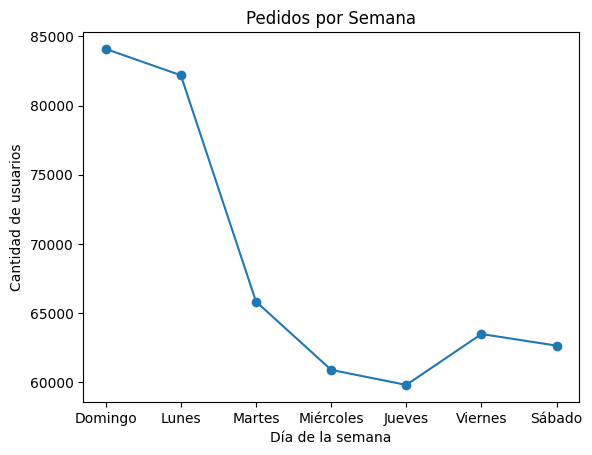

In [33]:
df_plot_A3=df_orders.groupby('order_dow')['user_id'].count()
plot_A3=df_plot_A3.plot(style= 'o-',
                        xlabel='Día de la semana',
                        ylabel='Cantidad de usuarios',
                        title='Pedidos por Semana',
                        rot=0,
                        legend=False)
dias_semana = ['Domingo', 'Lunes', 'Martes', 'Miércoles', 'Jueves', 'Viernes', 'Sábado']
plot_A3.set_xticks(range(len(dias_semana)))
plot_A3.set_xticklabels(dias_semana)
plt.show()

Se evidencia facilmente que el domingo por mucho es cuando más reciben pedidos

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Bien, con esta gráfica se visualiza correctamente la distribución de los pedidos a lo largo de la semana.
</div>

### [A4] ¿Cuánto tiempo esperan las personas hasta hacer otro pedido? Comenta sobre los valores mínimos y máximos.

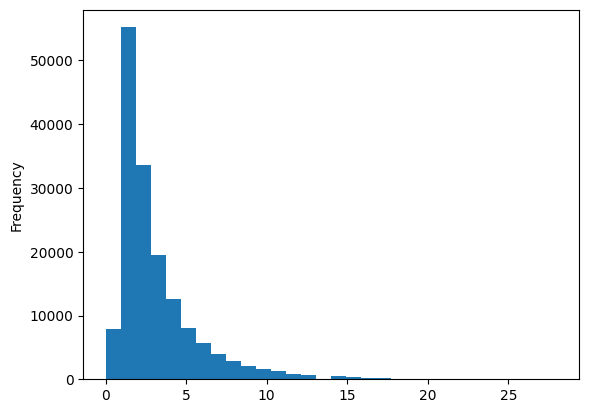

Los dias que las personas esperan para hacer otro pedido oscila entre 0 y 28


In [34]:
df_plot_A4=df_orders.groupby('user_id')['days_since_prior_order'].count()
df_plot_A4.plot(kind='hist',
                bins=30)
plt.show()

print('Los dias que las personas esperan para hacer otro pedido oscila entre',df_plot_A4.min(),'y',df_plot_A4.max())


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Bien, con esta gráfica se visualiza correctamente la distribución de los días para hacer otro pedido.
</div>

Podemos visualizar de manera muy eficiente cuanto tiempo se demoran en volver a pedir los usuarios siendo entre 0 y 5 el tiempo que mas personas esperan

# [B] Intermedio (deben completarse todos para aprobar)

1. ¿Existe alguna diferencia entre las distribuciones `'order_hour_of_day'` de los miércoles y los sábados? Traza gráficos de barra de `'order_hour_of_day'` para ambos días en la misma figura y describe las diferencias que observes.
2. Grafica la distribución para el número de órdenes que hacen los clientes (es decir, cuántos clientes hicieron solo 1 pedido, cuántos hicieron 2, cuántos 3, y así sucesivamente...).
3. ¿Cuáles son los 20 principales productos que se piden con más frecuencia (muestra su identificación y nombre)?

### [B1] Diferencia entre miércoles y sábados para  `'order_hour_of_day'`. Traza gráficos de barra para los dos días y describe las diferencias que veas.

In [35]:
B1_Miercoles= df_orders[df_orders['order_dow']==4].groupby('order_hour_of_day')['user_id'].count()
B1_Sabado= df_orders[df_orders['order_dow']==5].groupby('order_hour_of_day')['user_id'].count()
print(B1_Miercoles,B1_Sabado)

order_hour_of_day
0      324
1      229
2      114
3      109
4      100
5      198
6      594
7     1787
8     3136
9     4332
10    4938
11    4842
12    4433
13    4567
14    4795
15    4795
16    4788
17    4089
18    3379
19    2691
20    2037
21    1506
22    1236
23     791
Name: user_id, dtype: int64 order_hour_of_day
0      459
1      219
2      123
3       99
4      118
5      229
6      654
7     1933
8     3373
9     4794
10    5347
11    5325
12    4836
13    5108
14    5265
15    5352
16    4991
17    4169
18    3441
19    2597
20    1886
21    1368
22    1028
23     774
Name: user_id, dtype: int64


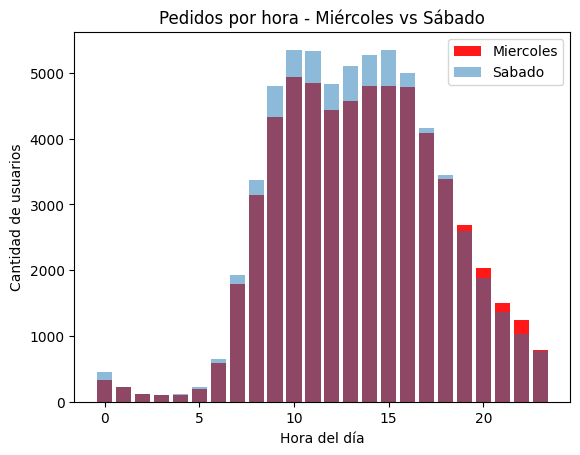

In [36]:
plt.bar(B1_Miercoles.index,
        B1_Miercoles.values,
        color='red',
        alpha=0.9,
        label='Miercoles')
plt.bar(B1_Sabado.index,
        B1_Sabado.values,
        alpha=0.5,
       label='Sabado')

plt.xlabel('Hora del día')
plt.ylabel('Cantidad de usuarios')
plt.title('Pedidos por hora - Miércoles vs Sábado')
plt.legend()

plt.show()

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Buen uso del group by para obtener estos conteos y colocaste correctamente las barras una encima de la otra para poder compararlas mejor.
</div>

Se puede ver que el sábado se tienen más compras si comparamos día completo, el sabado presenta mas comoras entre las 5 am y las 6 pm, mietras que el miercoles de 7pm a 11pm se evidenca un poco superior.

### [B2] ¿Cuál es la distribución para el número de pedidos por cliente?

In [38]:

plt_B2=df_orders.groupby('order_number')['user_id'].count()


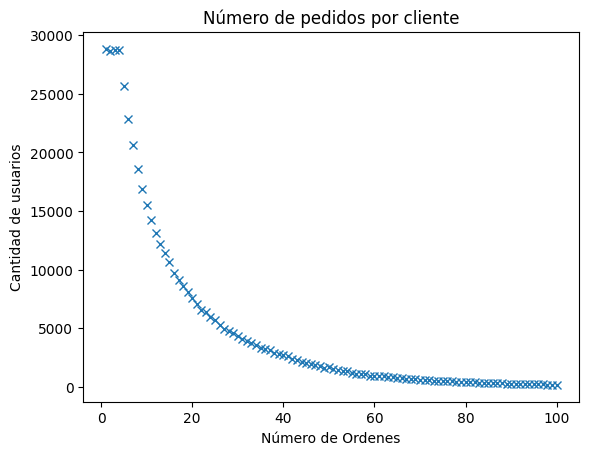

In [39]:
plt_B2=df_orders.groupby('order_number')['user_id'].count()
plt_B2.plot(style='x',
            xlabel='Número de Ordenes',
            ylabel='Cantidad de usuarios',
            title='Número de pedidos por cliente',
            rot=0)
plt.show()

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

¡Muy bien! Esta gráfica muestra correctamente la cantidad de ordenes que realizan los usuarios.
</div>

es una tendencia que decae, hay mas personas con pocas ordenes que con muchas, lo cual es normal en todos los comercios. 

### [B3] ¿Cuáles son los 20 productos más populares (muestra su ID y nombre)?

In [40]:
exe_B3=df_order_products.groupby('product_id')['order_id'].nunique()
exe_B3_sort=exe_B3.sort_values(ascending=False)
print(exe_B3_sort)

product_id
24852    66050
13176    53297
21137    37039
21903    33971
47209    29773
         ...  
5836         1
43573        1
43570        1
36174        1
41403        1
Name: order_id, Length: 45573, dtype: int64


In [41]:
most_20 = []
for i in range(21):
    most_20.append(exe_B3_sort.iloc[i])
print(most_20)

[66050, 53297, 37039, 33971, 29773, 24689, 21495, 20018, 19690, 19600, 19197, 15898, 15292, 14584, 13879, 13675, 12544, 12232, 11993, 11781, 11755]


In [42]:
df_most_popular = df_products[df_products['product_id'].isin(most_20)][['product_id', 'product_name']]
print(df_most_popular)


       product_id                                       product_name
11451       11755                                       chili powder
11477       11781               mushroom- spinach- and salsa tamales
11682       11993                        sharp cheddar cheese slices
11916       12232            original diced tomatoes & green chilies
12218       12544                                  mezze penne pasta
13322       13675                        pure tart cherry 100% juice
13523       13879                      organic green tea with ginger
14210       14584  chewy chocolate made with reese's peanut butte...
14894       15292                           made vitamin d3 1000 i.u
15478       15898  mango peach omega swirl omage-3 fish oil suppl...
18693       19197            show me the honey crunchy coconut chips
19084       19600   classic meal for 2 chicken florentine & farfalle
19172       19690                                  green oak lettuce
19494       20018                 

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Esta lista es correcta.
</div>

Escribe aquí tus conclusiones

# [C] Difícil (deben completarse todos para aprobar)

1. ¿Cuántos artículos suelen comprar las personas en un pedido? ¿Cómo es la distribución?
2. ¿Cuáles son los 20 principales artículos que vuelven a pedirse con mayor frecuencia (muestra sus nombres e IDs de los productos)?
3. Para cada producto, ¿cuál es la tasa de repetición del pedido (número de repeticiones de pedido/total de pedidos?
4. Para cada cliente, ¿qué proporción de los productos que pidió ya los había pedido? Calcula la tasa de repetición de pedido para cada usuario en lugar de para cada producto.
5. ¿Cuáles son los 20 principales artículos que la gente pone primero en sus carritos (muestra las IDs de los productos, sus nombres, y el número de veces en que fueron el primer artículo en añadirse al carrito)?

### [C1] ¿Cuántos artículos compran normalmente las personas en un pedido? ¿Cómo es la distribución?

In [49]:
plot_C1=df_order_products.groupby('order_id')['product_id'].count()
print(plot_C1.sample(20))


order_id
1999709     1
1163516     4
472981      4
2123918    26
2483783     2
3168205    15
3311948     5
25407       7
2615230    12
1739019    19
528649      7
782698     18
1972834    23
1461433    15
2995509    21
636093     26
637380     12
3070660     4
2289984     5
3405774    16
Name: product_id, dtype: int64


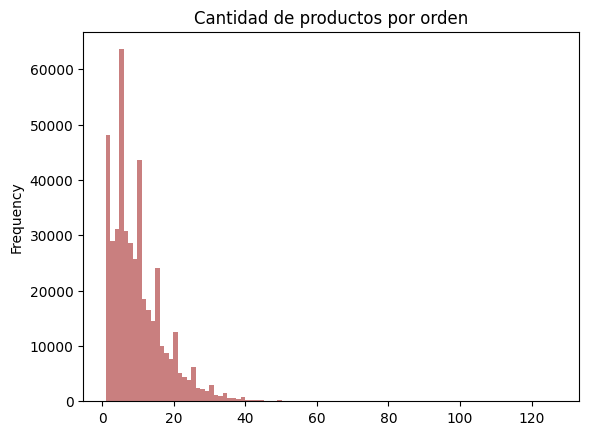

In [66]:
plot_C1.plot(kind='hist',bins=100,alpha=0.6,color='brown',title='Cantidad de productos por orden')
plt.show()

In [62]:
print('El promedio de productos en una orden es de: ' ,plot_C1.mean(), 'productos' ,
     ', la orden que menos productos tiene es de: ', plot_C1.min(),'producto' ,
     'y la orden que más es: ',plot_C1.max(),'productos' )
print(plot_C1.mode())

El promedio de productos en una orden es de:  10.098983215049127 productos , la orden que menos productos tiene es de:  1 producto y la orden que más es:  127 productos
0    5
dtype: int64


Por el histograma y el promedio, máximo y minimo se puede ver que las ordenes mas normales o las más recurrentes estan entre 1 y 20 productos, hay algunos que stán bien afuera del rango como la orden de 127 productos en la misma orden. Pero la distribución nos dice que las ordenes mas recurentes están en aproximadamente 5 productos. 

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Bien hecho, el histograma muestra adecuadamente la cantidad de productos por orden.
</div>

### [C2] ¿Cuáles son los 20 principales artículos que vuelven a pedirse con mayor frecuencia (muestra sus nombres e IDs de los productos)?

In [74]:
exe_C2_reordered = df_order_products[df_order_products['reordered'] == 1]

In [79]:
top20_C2 = exe_C2_reordered['product_id'].value_counts().head(20).reset_index()
top20_C2.columns = ['product_id', 'reorder_count']

print(top20_C2)

    product_id  reorder_count
0        24852          55763
1        13176          44450
2        21137          28639
3        21903          26233
4        47209          23629
5        47766          18743
6        27845          16251
7        47626          15044
8        27966          14748
9        16797          13945
10       26209          13327
11       22935          11145
12       24964          10411
13       45007          10076
14       49683           9538
15       28204           8989
16        8277           8836
17       39275           8799
18        5876           8412
19       49235           8389


In [80]:
top20_products = top20_C2.merge(df_products[['product_id', 'product_name']], on='product_id', how='left')

    product_id  reorder_count              product_name
0        24852          55763                    banana
1        13176          44450    bag of organic bananas
2        21137          28639      organic strawberries
3        21903          26233      organic baby spinach
4        47209          23629      organic hass avocado
5        47766          18743           organic avocado
6        27845          16251        organic whole milk
7        47626          15044               large lemon
8        27966          14748       organic raspberries
9        16797          13945              strawberries
10       26209          13327                     limes
11       22935          11145      organic yellow onion
12       24964          10411            organic garlic
13       45007          10076          organic zucchini
14       49683           9538            cucumber kirby
15       28204           8989        organic fuji apple
16        8277           8836  apple honeycrisp 

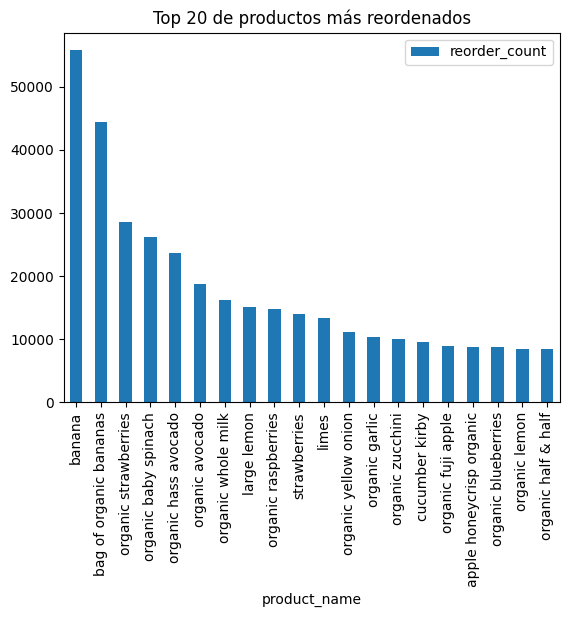

In [87]:
print(top20_products)
plt_C2=top20_products.plot(x='product_name',y='reorder_count',kind='bar', title='Top 20 de productos más reordenados',rot=90)

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Bien, usaste correctamente la columna reordered para poder encontrar esta lista.
</div>

la bananas son los productos que más se reordenan y productos orgánicos.

### [C3] Para cada producto, ¿cuál es la proporción de las veces que se pide y que se vuelve a pedir?

In [34]:
agg_dict = {'reordered': ['count', 'sum'] }
producto_proporcion_C3 =df_order_products.groupby('product_id').agg(agg_dict)
producto_proporcion_C3.columns = ['total_pedidos', 'total_reordenados']

print(producto_proporcion_C3)

            total_pedidos  total_reordenados
product_id                                  
1                     280                158
2                      11                  0
3                      42                 31
4                      49                 25
7                       2                  1
...                   ...                ...
49690                   5                  4
49691                  72                 31
49692                  12                  5
49693                  25                 11
49694                   9                  3

[45573 rows x 2 columns]


In [35]:
producto_proporcion_C3['proporcion_reordenado'] = producto_proporcion_C3['total_reordenados'] / producto_proporcion_C3['total_pedidos']

In [36]:
producto_proporcion_C3=producto_proporcion_C3.merge(df_products[['product_id', 'product_name']], on='product_id', how='left')
proporcion_final = producto_proporcion_C3[['product_name', 'proporcion_reordenado']]
print(proporcion_final)



                                            product_name  \
0                             chocolate sandwich cookies   
1                                       all-seasons salt   
2                   robust golden unsweetened oolong tea   
3      smart ones classic favorites mini rigatoni wit...   
4                         pure coconut water with orange   
...                                                  ...   
45569                                                NaN   
45570                                                NaN   
45571                                                NaN   
45572                                                NaN   
45573                                                NaN   

       proporcion_reordenado  
0                   0.564286  
1                   0.000000  
2                   0.738095  
3                   0.510204  
4                   0.500000  
...                      ...  
45569               0.800000  
45570               0.430556  


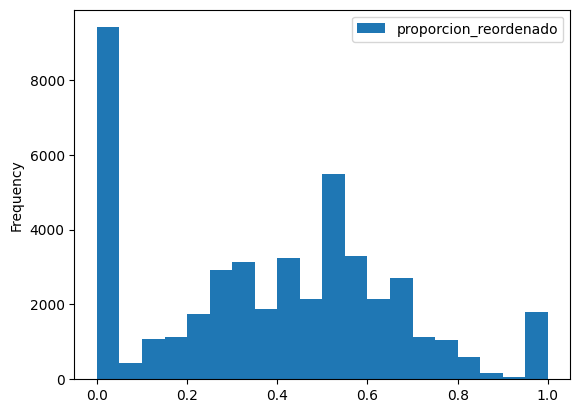

In [206]:
plt_C3=proporcion_final.plot(kind='hist',bins=20)
plt.show()

In [209]:
proporcion_final.sample(20)

,product_name,proporcion_reordenado
14325,hot smoked sausage,0.600000
10386,family size peanut butter cracker sandwiches,0.480000
40496,organic greens vegetable chips,0.618182
4388,organic insecticide ant & cockroach killer,0.000000
27368,gluten free margherita pizza,0.361111
18169,organic whole milk yogurt,0.478261
6349,creamy broth with mackerel & vegetables cat food,0.714286
14726,mousse du perigod,0.400000
16127,goldfish cheddar baked snack crackers,0.576850
12220,farfalle tricolor pasta no. 93,0.666667


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Bien, realizaste correctamnte los cálculos entre las columnas para obtener esta proporción.
</div>

Se puede ver que la mayoría de productos no son reordenados, pero los que si. la proporción que más se reordenan son los del 0.5 como el chocolate sandwich cookies

### [C4] Para cada cliente, ¿qué proporción de sus productos ya los había pedido?

In [75]:
exe_C4=producto_proporcion_C3.merge(df_order_products[['product_id', 'order_id']], on='product_id', how='left')
exe_C4.head(10)
exe_C4=exe_C4.merge(df_orders[['order_id', 'user_id']], on='order_id', how='left')

La proporcion por cliente e puede ver mejor en el siguiente histograma: 



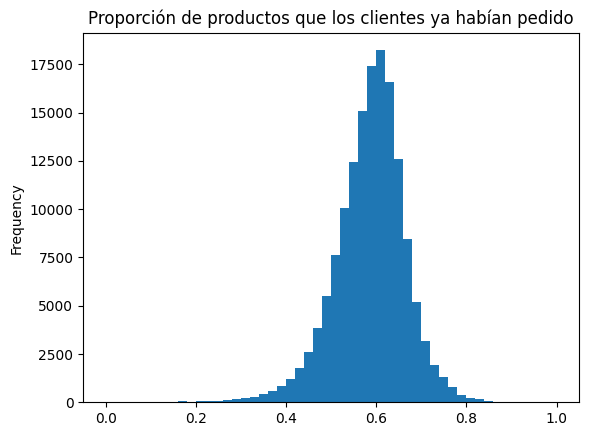

,user_id,proporcion_reordenado
15516,21364,0.571763
9210,12662,0.692397
9614,13198,0.527188
121656,167805,0.781776
24752,34184,0.644612
10801,14805,0.512441
118821,163919,0.637160
140077,193110,0.591046
23818,32887,0.661068
74965,103373,0.558307


In [91]:
exe_C4_grp= exe_C4.groupby('user_id')['proporcion_reordenado'].mean()
exe_C4_grp.columns = ['user_id', 'proporcion_reordenado']
print('La proporcion por cliente e puede ver mejor en el siguiente histograma: \n')
exe_C4_grp.plot(kind='hist',bins=50, title='Proporción de productos que los clientes ya habían pedido')
plt.show()
exe_C4_grp= exe_C4_grp.reset_index()
exe_C4_grp.sample(20)

Podemos encontrar que para cada cliente su proporcion de valores que ya había comprado se puede ver en el data frame exe_C4_grp pero para poder visualizarlo mejor se puso el histograma. 

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Bien hecho, usando el group by y el mean es posible obtener esta nueva columna.
</div>

### [C5] ¿Cuáles son los 20 principales artículos que las personas ponen primero en sus carritos?

In [92]:
'add_to_cart_order'
'product_id'

primeros_en_carrito = df_order_products[df_order_products['add_to_cart_order'] == 1]
top20_C5 = primeros_en_carrito['product_id'].value_counts().head(20).reset_index()
top20_C5.columns = ['product_id', 'veces_primer_lugar']
print(top20_C5)

    product_id  veces_primer_lugar
0        24852               15562
1        13176               11026
2        27845                4363
3        21137                3946
4        47209                3390
5        21903                3336
6        47766                3044
7        19660                2336
8        16797                2308
9        27966                2024
10       44632                1914
11       49235                1797
12       47626                1737
13         196                1733
14       38689                1397
15       26209                1370
16       12341                1340
17        5785                1310
18       27086                1309
19       22935                1246


In [79]:
top20_C5 = top20_C5.merge(df_products[['product_id', 'product_name']], on='product_id', how='left')

In [80]:
top20_C5 = top20_C5.sort_values(by='veces_primer_lugar', ascending=False)


print(top20_C5)

    product_id  veces_primer_lugar                 product_name
0        24852               15562                       banana
1        13176               11026       bag of organic bananas
2        27845                4363           organic whole milk
3        21137                3946         organic strawberries
4        47209                3390         organic hass avocado
5        21903                3336         organic baby spinach
6        47766                3044              organic avocado
7        19660                2336                 spring water
8        16797                2308                 strawberries
9        27966                2024          organic raspberries
10       44632                1914   sparkling water grapefruit
11       49235                1797          organic half & half
12       47626                1737                  large lemon
13         196                1733                         soda
14       38689                1397     o

Ya se puede ver los productos principales que pusieron de primeras el el carrito. 

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Bien hecho.
</div>

### Conclusion general del proyecto:

In [1]:
print('En este proyecto se pudo evidenciar la necesidad de los pasos de limpieza de datos, de llenar los datos faltantes y repetidos. \n',
     '   - en referencia a los datos analizados fue interezante poder ver las diferencias entre los pedidos de las horas del día y los días de la semana')

En este proyecto se pudo evidenciar la necesidad de los pasos de limpieza de datos, de llenar los datos faltantes y repetidos. 
    - en referencia a los datos analizados fue interezante poder ver las diferencias entre los pedidos de las horas del día y los días de la semana


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Buenas conclusiones basadas en lo observado a lo largo del proyecto.
</div>

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

¡Muy bien! 
    
Te quiero felicitar por tu proyecto, está bastante completo y bien realizado, me gustó especialmente el buen uso de los group by para realizar los cálculos. Todo está completo y no es necesario realizar ningún cambio, te deseo mucho éxito en los siguientes sprints.
    
Saludos, Marcos.
</div>